### Pandas Task

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

happiness_org_df = pd.read_csv('./datasets/happiness_report_2023.csv')

In [340]:
# 정보 확인
print(happiness_org_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB
None


In [341]:
# 각 feature의 정보 확인
display(happiness_org_df.describe())

happiness_score  gdp_per_capita  social_support  \
count       137.000000      137.000000      137.000000   
mean          5.539796        1.406985        1.156212   
std           1.139929        0.432963        0.326322   
min           1.859000        0.000000        0.000000   
25%           4.724000        1.099000        0.962000   
50%           5.684000        1.449000        1.227000   
75%           6.334000        1.798000        1.401000   
max           7.804000        2.200000        1.620000   

       healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
count               136.000000                    137.000000  137.000000   
mean                  0.366176                      0.540000    0.148474   
std                   0.156691                      0.149501    0.076053   
min                   0.000000                      0.000000    0.000000   
25%                   0.248500                      0.455000    0.097000   
50%                   0.389500                      0.557000    0.137000   
75%                   0.487500                      0.656000    0.199000   
max                   0.702000                      0.772000    0.422000   

       perceptions_of_corruption  
count                 137.000000  
mean                    0.145898  
std                     0.126723  
min                     0.000000  
25%                     0.060000  
50%                     0.111000  
75%                     0.187000  
max                     0.561000

In [342]:
# 각 feature의 숫자 확인
print(happiness_org_df.count())

country                         137
region                          137
happiness_score                 137
gdp_per_capita                  137
social_support                  137
healthy_life_expectancy         136
freedom_to_make_life_choices    137
generosity                      137
perceptions_of_corruption       137
dtype: int64


In [343]:
# 결측치 숫자 확인 후 데이터 확인
print(happiness_org_df.isna().sum())
happiness_org_df[happiness_org_df['healthy_life_expectancy'].isna()]

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64


country                        region  happiness_score  \
98  State of Palestine  Middle East and North Africa            4.908   

    gdp_per_capita  social_support  healthy_life_expectancy  \
98           1.144           1.309                      NaN   

    freedom_to_make_life_choices  generosity  perceptions_of_corruption  
98                         0.416       0.065                      0.067

In [344]:
# 평균으로 결측치 대체
happiness_org_df['healthy_life_expectancy']= happiness_org_df['healthy_life_expectancy'].fillna(happiness_org_df['healthy_life_expectancy'].mean())
happiness_org_df

country                        region  happiness_score  \
0             Finland                Western Europe            7.804   
1             Denmark                Western Europe            7.586   
2             Iceland                Western Europe            7.530   
3              Israel  Middle East and North Africa            7.473   
4         Netherlands                Western Europe            7.403   
..                ...                           ...              ...   
132  Congo (Kinshasa)            Sub-Saharan Africa            3.207   
133          Zimbabwe            Sub-Saharan Africa            3.204   
134      Sierra Leone            Sub-Saharan Africa            3.138   
135           Lebanon  Middle East and North Africa            2.392   
136       Afghanistan                    South Asia            1.859   

     gdp_per_capita  social_support  healthy_life_expectancy  \
0             1.888           1.585                    0.535   
1             1.949           1.548                    0.537   
2             1.926           1.620                    0.559   
3             1.833           1.521                    0.577   
4             1.942           1.488                    0.545   
..              ...             ...                      ...   
132           0.531           0.784                    0.105   
133           0.758           0.881                    0.069   
134           0.670           0.540                    0.092   
135           1.417           0.476                    0.398   
136           0.645           0.000                    0.087   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                           0.772       0.126                      0.535  
1                           0.734       0.208                      0.525  
2                           0.738       0.250                      0.187  
3                           0.569       0.124                      0.158  
4                           0.672       0.251                      0.394  
..                            ...         ...                        ...  
132                         0.375       0.183                      0.068  
133                         0.363       0.112                      0.117  
134                         0.371       0.193                      0.051  
135                         0.123       0.061                      0.027  
136                         0.000       0.093                      0.059  

[137 rows x 9 columns]

In [345]:
# 이상치 검사를 위해 뽑아보기
def get_outlier(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    iqr_value = Q3 - Q1
    upper_bound = Q3 + 1.5 * iqr_value
    lower_bound = Q1 - 1.5 * iqr_value
    
    # 이상치 확인 및 출력
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    print(f'{column} 이상치: {len(outliers)} 개')
    print(upper_bound, lower_bound, sep='\n')
    display(outliers)



happiness_org_df.columns.values

columns =['happiness_score', 'gdp_per_capita', 'social_support',
 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
 'perceptions_of_corruption']


for column in columns:
    get_outlier(happiness_org_df, column)

happiness_score 이상치: 1 개
8.748999999999999
2.309000000000001


country      region  happiness_score  gdp_per_capita  social_support  \
136  Afghanistan  South Asia            1.859           0.645             0.0   

     healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
136                    0.087                           0.0       0.093   

     perceptions_of_corruption  
136                      0.059

gdp_per_capita 이상치: 1 개
2.8465000000000003
0.05049999999999977


country                       region  happiness_score  gdp_per_capita  \
87  Venezuela  Latin America and Caribbean            5.211             0.0   

    social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
87           1.257                    0.341                         0.369   

    generosity  perceptions_of_corruption  
87       0.205                      0.084

social_support 이상치: 2 개
2.0595
0.3034999999999999


country              region  happiness_score  gdp_per_capita  \
115        Benin  Sub-Saharan Africa            4.374           0.924   
136  Afghanistan          South Asia            1.859           0.645   

     social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
115           0.242                    0.124                         0.481   
136           0.000                    0.087                         0.000   

     generosity  perceptions_of_corruption  
115       0.114                      0.253  
136       0.093                      0.059

healthy_life_expectancy 이상치: 0 개
0.84
-0.10399999999999998


Empty DataFrame
Columns: [country, region, happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption]
Index: []

freedom_to_make_life_choices 이상치: 4 개
0.9575
0.15350000000000003


country                        region  happiness_score  \
105      Turkiye  Middle East and North Africa            4.614   
129      Comoros            Sub-Saharan Africa            3.545   
135      Lebanon  Middle East and North Africa            2.392   
136  Afghanistan                    South Asia            1.859   

     gdp_per_capita  social_support  healthy_life_expectancy  \
105           1.714           1.148                    0.467   
129           0.914           0.327                    0.215   
135           1.417           0.476                    0.398   
136           0.645           0.000                    0.087   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  
105                         0.125       0.095                      0.096  
129                         0.117       0.129                      0.145  
135                         0.123       0.061                      0.027  
136                         0.000       0.093                      0.059

generosity 이상치: 2 개
0.35200000000000004
-0.05600000000000002


country          region  happiness_score  gdp_per_capita  \
83   Indonesia  Southeast Asia            5.277           1.384   
116    Myanmar  Southeast Asia            4.372           1.032   

     social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
83            1.169                    0.314                         0.663   
116           1.125                    0.269                         0.460   

     generosity  perceptions_of_corruption  
83        0.422                      0.038  
116       0.400                      0.194

perceptions_of_corruption 이상치: 11 개
0.3775
-0.1305


country                 region  happiness_score  \
0                     Finland         Western Europe            7.804   
1                     Denmark         Western Europe            7.586   
4                 Netherlands         Western Europe            7.403   
5                      Sweden         Western Europe            7.395   
6                      Norway         Western Europe            7.315   
7                 Switzerland         Western Europe            7.240   
8                  Luxembourg         Western Europe            7.228   
9                 New Zealand  North America and ANZ            7.123   
13                    Ireland         Western Europe            6.911   
24                  Singapore         Southeast Asia            6.587   
81  Hong Kong S.A.R. of China              East Asia            5.308   

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            1.888           1.585                    0.535   
1            1.949           1.548                    0.537   
4            1.942           1.488                    0.545   
5            1.921           1.510                    0.562   
6            1.994           1.521                    0.544   
7            2.022           1.463                    0.582   
8            2.200           1.357                    0.549   
9            1.842           1.544                    0.513   
13           2.152           1.425                    0.539   
24           2.168           1.354                    0.607   
81           1.951           1.201                    0.702   

    freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                          0.772       0.126                      0.535  
1                          0.734       0.208                      0.525  
4                          0.672       0.251                      0.394  
5                          0.754       0.225                      0.520  
6                          0.752       0.212                      0.463  
7                          0.678       0.151                      0.475  
8                          0.710       0.149                      0.418  
9                          0.672       0.230                      0.471  
13                         0.656       0.186                      0.409  
24                         0.660       0.170                      0.561  
81                         0.407       0.123                      0.390

In [346]:
# 최소값과 최댓값으로 이상치 대체
def replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    iqr_value = Q3 - Q1
    upper_bound = Q3 + 1.5 * iqr_value
    lower_bound = Q1 - 1.5 * iqr_value
    
    # 상한값보다 높은 이상치를 상한값으로 변경
    data.loc[data[column] > upper_bound, column] = upper_bound
    
    # 하한값보다 낮은 이상치를 하한값으로 변경
    data.loc[data[column] < lower_bound, column] = lower_bound
    
    # 하한값이 0보다 작으면 0으로 변경
    if lower_bound < 0:
        data.loc[data[column] < 0, column] = 0
    
    # 변경된 값을 반환
    return data

columns = ['happiness_score', 'gdp_per_capita', 'social_support',
           'healthy_life_expectancy', 'freedom_to_make_life_choices', 
           'generosity', 'perceptions_of_corruption']

for column in columns:
    happiness_org_df = replace_outliers(happiness_org_df, column)

# 변경된 데이터프레임 출력
display(happiness_org_df)


country                        region  happiness_score  \
0             Finland                Western Europe            7.804   
1             Denmark                Western Europe            7.586   
2             Iceland                Western Europe            7.530   
3              Israel  Middle East and North Africa            7.473   
4         Netherlands                Western Europe            7.403   
..                ...                           ...              ...   
132  Congo (Kinshasa)            Sub-Saharan Africa            3.207   
133          Zimbabwe            Sub-Saharan Africa            3.204   
134      Sierra Leone            Sub-Saharan Africa            3.138   
135           Lebanon  Middle East and North Africa            2.392   
136       Afghanistan                    South Asia            2.309   

     gdp_per_capita  social_support  healthy_life_expectancy  \
0             1.888          1.5850                    0.535   
1             1.949          1.5480                    0.537   
2             1.926          1.6200                    0.559   
3             1.833          1.5210                    0.577   
4             1.942          1.4880                    0.545   
..              ...             ...                      ...   
132           0.531          0.7840                    0.105   
133           0.758          0.8810                    0.069   
134           0.670          0.5400                    0.092   
135           1.417          0.4760                    0.398   
136           0.645          0.3035                    0.087   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                          0.7720       0.126                     0.3775  
1                          0.7340       0.208                     0.3775  
2                          0.7380       0.250                     0.1870  
3                          0.5690       0.124                     0.1580  
4                          0.6720       0.251                     0.3775  
..                            ...         ...                        ...  
132                        0.3750       0.183                     0.0680  
133                        0.3630       0.112                     0.1170  
134                        0.3710       0.193                     0.0510  
135                        0.1535       0.061                     0.0270  
136                        0.1535       0.093                     0.0590  

[137 rows x 9 columns]

In [347]:
# 상위 20개국
top_20 = happiness_org_df.head(20)
display(top_20)

country                        region  happiness_score  \
0          Finland                Western Europe            7.804   
1          Denmark                Western Europe            7.586   
2          Iceland                Western Europe            7.530   
3           Israel  Middle East and North Africa            7.473   
4      Netherlands                Western Europe            7.403   
5           Sweden                Western Europe            7.395   
6           Norway                Western Europe            7.315   
7      Switzerland                Western Europe            7.240   
8       Luxembourg                Western Europe            7.228   
9      New Zealand         North America and ANZ            7.123   
10         Austria                Western Europe            7.097   
11       Australia         North America and ANZ            7.095   
12          Canada         North America and ANZ            6.961   
13         Ireland                Western Europe            6.911   
14   United States         North America and ANZ            6.894   
15         Germany                Western Europe            6.892   
16         Belgium                Western Europe            6.859   
17         Czechia    Central and Eastern Europe            6.845   
18  United Kingdom                Western Europe            6.796   
19       Lithuania    Central and Eastern Europe            6.763   

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            1.888           1.585                    0.535   
1            1.949           1.548                    0.537   
2            1.926           1.620                    0.559   
3            1.833           1.521                    0.577   
4            1.942           1.488                    0.545   
5            1.921           1.510                    0.562   
6            1.994           1.521                    0.544   
7            2.022           1.463                    0.582   
8            2.200           1.357                    0.549   
9            1.842           1.544                    0.513   
10           1.927           1.382                    0.535   
11           1.899           1.497                    0.532   
12           1.881           1.484                    0.541   
13           2.152           1.425                    0.539   
14           1.980           1.460                    0.390   
15           1.919           1.401                    0.539   
16           1.907           1.449                    0.528   
17           1.823           1.544                    0.477   
18           1.857           1.366                    0.511   
19           1.808           1.511                    0.432   

    freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                          0.772       0.126                     0.3775  
1                          0.734       0.208                     0.3775  
2                          0.738       0.250                     0.1870  
3                          0.569       0.124                     0.1580  
4                          0.672       0.251                     0.3775  
5                          0.754       0.225                     0.3775  
6                          0.752       0.212                     0.3775  
7                          0.678       0.151                     0.3775  
8                          0.710       0.149                     0.3775  
9                          0.672       0.230                     0.3775  
10                         0.630       0.191                     0.3100  
11                         0.677       0.242                     0.3100  
12                         0.656       0.218                     0.3640  
13                         0.656       0.186                     0.3775  
14                         0.557       0.210                     0.1720  
15                         0.618       0.153         

In [348]:
top_20['region'].value_counts()

# 상위 20개 국의 75%가 유럽, 20%가 미주국가

region
Western Europe                  13
North America and ANZ            4
Central and Eastern Europe       2
Middle East and North Africa     1
Name: count, dtype: int64

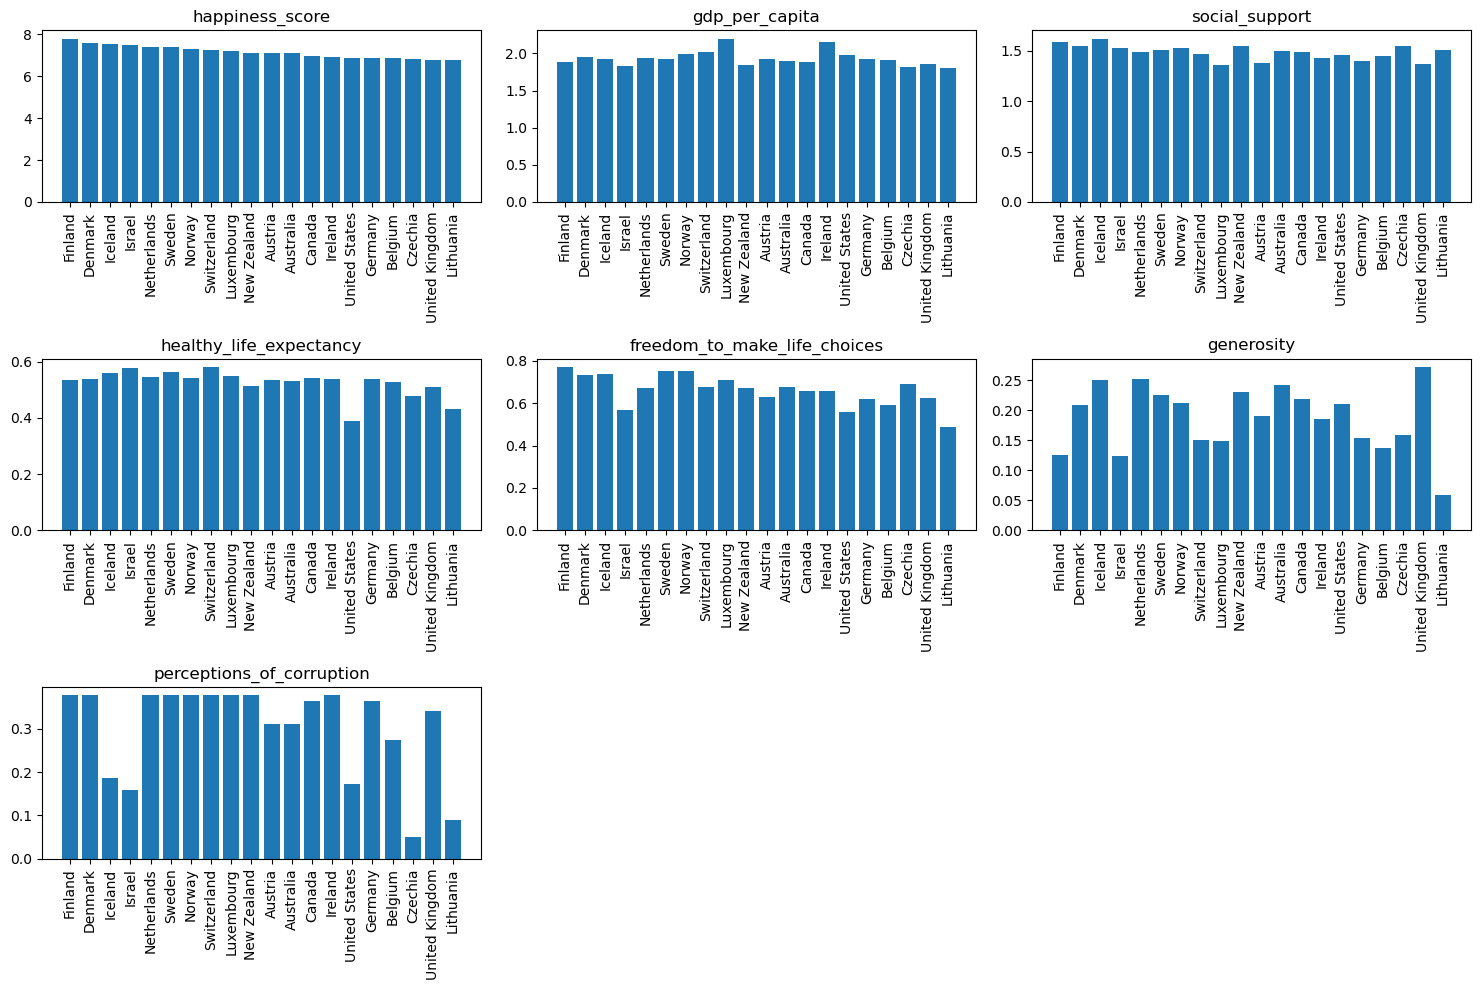

In [349]:

# 'region' 칼럼 제외
top_20_numeric = top_20.drop(columns=['region'])

# 그래프 크기 설정
plt.figure(figsize=(15, 10))  # 적절한 크기로 조정

# 각 칼럼에 대한 막대 그래프 표시
for i, column in enumerate(top_20_numeric.columns[1:]):
    plt.subplot(3, 3, i + 1)  # 3x3 그리드로 조정
    plt.bar(top_20_numeric['country'], top_20_numeric[column])
    plt.title(column)

    # x축 라벨 90도 회전
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


In [350]:
# 하위 20개국
bottom_20 = happiness_org_df.tail(20)
display(bottom_20)

country                        region  happiness_score  \
117        Bangladesh                    South Asia            4.282   
118            Gambia            Sub-Saharan Africa            4.279   
119              Mali            Sub-Saharan Africa            4.198   
120             Egypt  Middle East and North Africa            4.170   
121              Togo            Sub-Saharan Africa            4.137   
122            Jordan  Middle East and North Africa            4.120   
123          Ethiopia            Sub-Saharan Africa            4.091   
124           Liberia            Sub-Saharan Africa            4.042   
125             India                    South Asia            4.036   
126        Madagascar            Sub-Saharan Africa            4.019   
127            Zambia            Sub-Saharan Africa            3.982   
128          Tanzania            Sub-Saharan Africa            3.694   
129           Comoros            Sub-Saharan Africa            3.545   
130            Malawi            Sub-Saharan Africa            3.495   
131          Botswana            Sub-Saharan Africa            3.435   
132  Congo (Kinshasa)            Sub-Saharan Africa            3.207   
133          Zimbabwe            Sub-Saharan Africa            3.204   
134      Sierra Leone            Sub-Saharan Africa            3.138   
135           Lebanon  Middle East and North Africa            2.392   
136       Afghanistan                    South Asia            2.309   

     gdp_per_capita  social_support  healthy_life_expectancy  \
117           1.133          0.5130                    0.355   
118           0.761          0.6140                    0.174   
119           0.763          0.6370                    0.106   
120           1.377          0.9720                    0.326   
121           0.770          0.6420                    0.161   
122           1.292          0.9800                    0.438   
123           0.793          1.1140                    0.250   
124           0.628          0.6440                    0.141   
125           1.159          0.6740                    0.252   
126           0.632          0.7790                    0.178   
127           0.914          0.8900                    0.095   
128           0.836          0.7870                    0.214   
129           0.914          0.3270                    0.215   
130           0.637          0.4790                    0.189   
131           1.471          1.0410                    0.087   
132           0.531          0.7840                    0.105   
133           0.758          0.8810                    0.069   
134           0.670          0.5400                    0.092   
135           1.417          0.4760                    0.398   
136           0.645          0.3035                    0.087   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  
117                        0.6170       0.139                      0.165  
118                        0.2860       0.332                      0.033  
119                        0.4410       0.121                      0.059  
120                        0.4670       0.038                      0.250  
121                        0.3670       0.149                      0.136  
122                        0.5170       0.056                      0.173  
123                        0.4510       0.283                      0.101  
124                        0.4710       0.219                      0.071  
125                        0.6850       0.175                      0.111  
126                        0.1870       0.177                      0.134  
127                        0.5450       0.189                      0.080  
128                        0.6070       0.234                      0.269  
129                        0.1535       0.129                      0.145  
130                        0.4900       0.139                      0.129  
131                        0.48

In [351]:
bottom_20['region'].value_counts()

# 하위국가 20개 중 85%가 아프리카에 포진

region
Sub-Saharan Africa              14
South Asia                       3
Middle East and North Africa     3
Name: count, dtype: int64

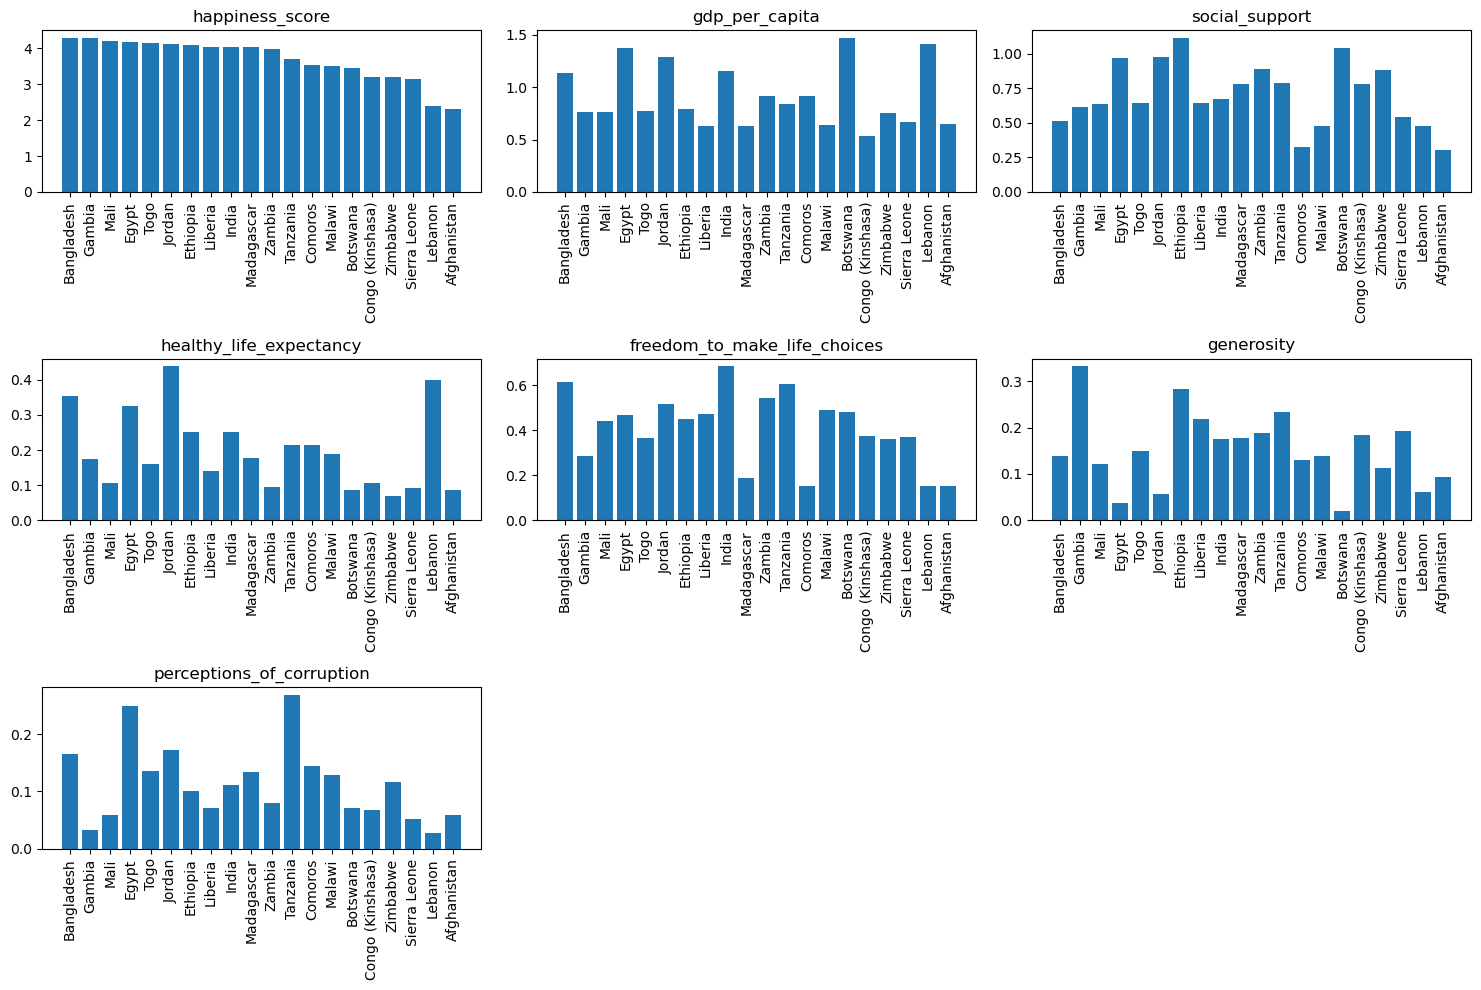

In [352]:
bottom_20_numeric = bottom_20.drop(columns=['region'])

# 그래프 크기 설정
plt.figure(figsize=(15, 10))  # 적절한 크기로 조정

# 각 칼럼에 대한 막대 그래프 표시
for i, column in enumerate(bottom_20_numeric.columns[1:]):
    plt.subplot(3, 3, i + 1)  # 3x3 그리드로 조정
    plt.bar(bottom_20_numeric['country'], bottom_20_numeric[column])
    plt.title(column)

    
    # x축 라벨 90도 회전
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

### 행복지수에 대한 분석결과

- 상위 20개 국의 75%가 유럽
    - Western Europe                  13
    - North America and ANZ            4
    - Central and Eastern Europe       2
    - Middle East and North Africa     1

- 하위국가 20개 중 85%가 아프리카
    - Sub-Saharan Africa              14
    - South Asia                       3
    - Middle East and North Africa     3

In [353]:
# 칼럼 기준으로 국가를 분류하는 함수 정의
def classify_level(value, column):
    if value >= column.quantile(0.75):
        return 'High'
    elif value >= column.quantile(0.50):
        return 'Upper Middle'
    elif value >= column.quantile(0.25):
        return 'Lower Middle'
    else:
        return 'Low'

In [354]:
happiness_df['income_level'] = happiness_df['gdp_per_capita'].apply(classify_level, args=(happiness_df['gdp_per_capita'],))
happiness_df['social_level'] = happiness_df['social_support'].apply(classify_level, args=(happiness_df['social_support'],))
happiness_df['le_level'] = happiness_df['healthy_life_expectancy'].apply(classify_level, args=(happiness_df['healthy_life_expectancy'],))
happiness_df['free_level'] = happiness_df['freedom_to_make_life_choices'].apply(classify_level, args=(happiness_df['freedom_to_make_life_choices'],))
happiness_df['gen_level'] = happiness_df['generosity'].apply(classify_level, args=(happiness_df['generosity'],))
happiness_df['poc_level'] = happiness_df['perceptions_of_corruption'].apply(classify_level, args=(happiness_df['perceptions_of_corruption'],))
happiness_df['happy_level'] = happiness_df['happiness_score'].apply(classify_level, args=(happiness_df['happiness_score'],))

In [355]:
hp_gdp_df = happiness_df.groupby('income_level').mean('happiness_score').reset_index()
hp_gdp_df_subset = hp_gdp_df[['income_level', 'happiness_score']]

# 결과 출력
display(hp_gdp_df_subset)

hp_social_df = happiness_df.groupby('social_level').mean('happiness_score').reset_index()
hp_social_df_subset = hp_social_df[['social_level', 'happiness_score']]

# 결과 출력
display(hp_social_df_subset)

hp_le_df = happiness_df.groupby('le_level').mean('happiness_score').reset_index()
hp_le_df_subset = hp_le_df[['le_level', 'happiness_score']]

# 결과 출력
display(hp_le_df_subset)

hp_free_df = happiness_df.groupby('free_level').mean('happiness_score').reset_index()
hp_free_df_subset = hp_free_df[['free_level', 'happiness_score']]

# 결과 출력
display(hp_free_df_subset)

hp_gen_df = happiness_df.groupby('gen_level').mean('happiness_score').reset_index()
hp_gen_df_subset = hp_gen_df[['gen_level', 'happiness_score']]

# 결과 출력
display(hp_gen_df_subset)

hp_poc_df = happiness_df.groupby('poc_level').mean('happiness_score').reset_index()
hp_poc_df_subset = hp_poc_df[['poc_level', 'happiness_score']]

# 결과 출력
display(hp_gen_df_subset)

income_level  happiness_score
0          High         6.798971
1           Low         4.363824
2  Lower Middle         5.171765
3  Upper Middle         5.800824

social_level  happiness_score
0          High         6.649886
1           Low         4.275235
2  Lower Middle         5.176500
3  Upper Middle         6.038147

le_level  happiness_score
0          High         6.724206
1           Low         4.349743
2  Lower Middle         5.463559
3  Upper Middle         5.669912

free_level  happiness_score
0          High         6.405472
1           Low         4.569441
2  Lower Middle         5.131667
3  Upper Middle         6.002912

gen_level  happiness_score
0          High         5.781086
1           Low         5.346471
2  Lower Middle         5.690147
3  Upper Middle         5.347618

gen_level  happiness_score
0          High         5.781086
1           Low         5.346471
2  Lower Middle         5.690147
3  Upper Middle         5.347618

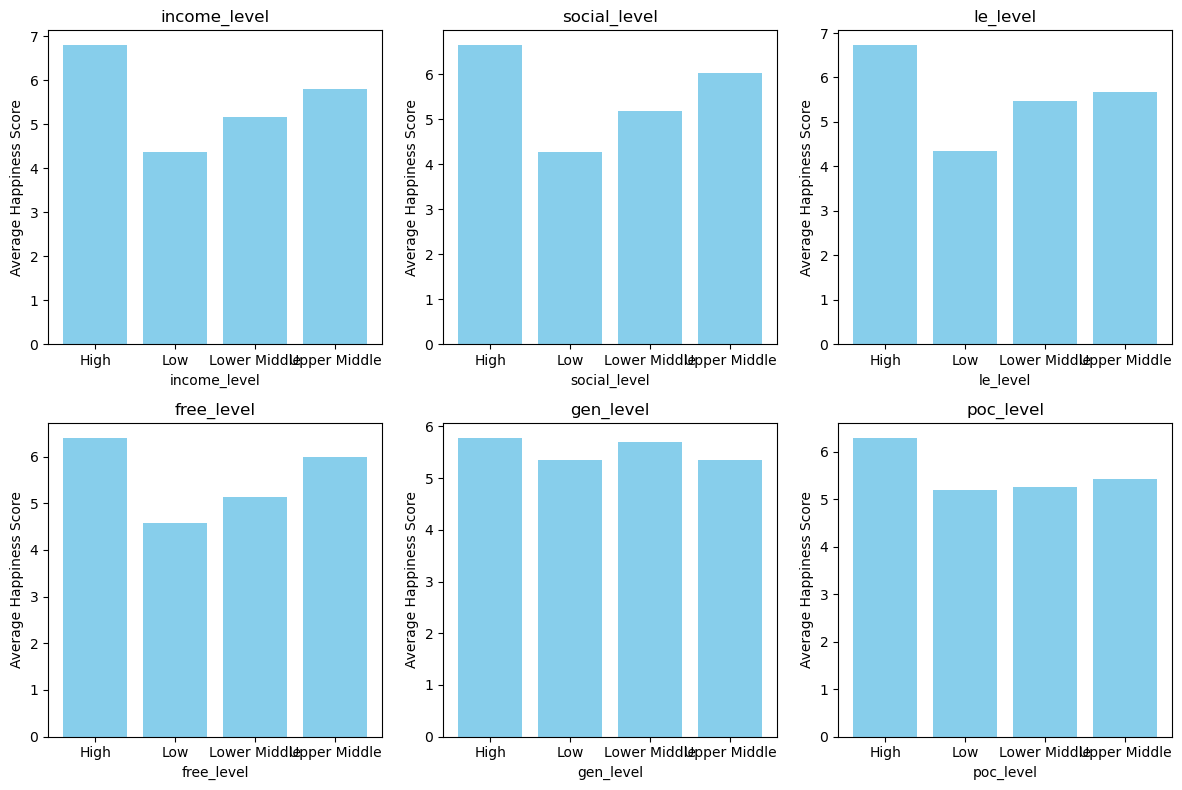

In [356]:

# 요인별 행복지수 평균 데이터프레임들
dfs = [hp_gdp_df_subset, hp_social_df_subset, hp_le_df_subset, hp_free_df_subset, hp_gen_df_subset, hp_poc_df_subset]

# 그래프 설정
plt.figure(figsize=(12, 8))

# 각 요인별 막대 그래프 표시
for i, df in enumerate(dfs):
    plt.subplot(2, 3, i+1)
    plt.bar(df.iloc[:, 0], df.iloc[:, 1], color='skyblue')
    plt.title(df.columns[0])
    plt.xlabel(df.columns[0])
    plt.ylabel('Average Happiness Score')

plt.tight_layout()
plt.show()

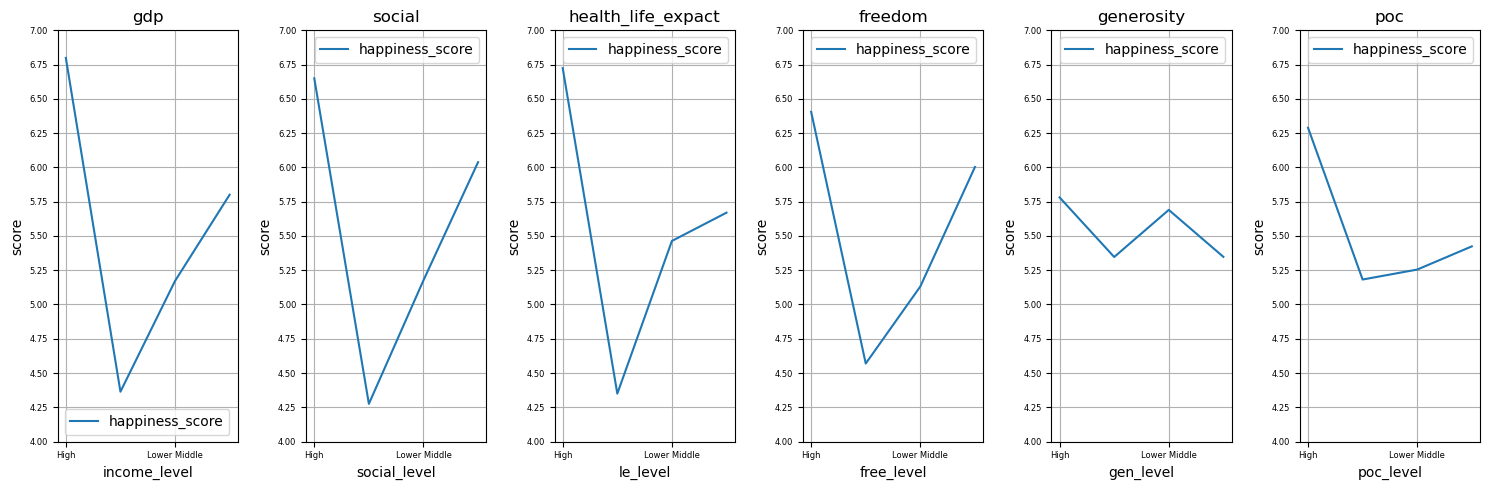

In [357]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# 각 subplot의 y축 범위 설정
y_range = (4, 7)  # y축의 범위 (최솟값, 최댓값)
y_ticks = [i / 4 for i in range(int(y_range[0] * 4), int((y_range[1] + 0.25) * 4), 1)]  # y축의 눈금 설정 (0.25 간격)

# 각 subplot 설정
hp_gdp_df_subset.plot(title='gdp', x='income_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[0], ylabel="score", ylim=y_range, yticks=y_ticks)
hp_social_df.plot(title='social', x='social_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[1], ylabel="score", ylim=y_range, yticks=y_ticks)
hp_le_df.plot(title='health_life_expact', x='le_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[2], ylabel="score", ylim=y_range, yticks=y_ticks)
hp_free_df.plot(title='freedom', x='free_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[3], ylabel="score", ylim=y_range, yticks=y_ticks)
hp_gen_df.plot(title='generosity', x='gen_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[4], ylabel="score", ylim=y_range, yticks=y_ticks)
hp_poc_df.plot(title='poc', x='poc_level', y='happiness_score', fontsize='6', kind='line', grid=True, ax=axes[5], ylabel="score", ylim=y_range, yticks=y_ticks)

plt.tight_layout()  # subplot 간의 간격 조정
plt.show()

In [358]:
hp_df = happiness_df.groupby('happy_level').mean('gdp_per_capita').reset_index()

hp_df = hp_df.drop(labels='happiness_score', axis = 1)

hp_df

happy_level  gdp_per_capita  social_support  healthy_life_expectancy  \
0          High        1.868086        1.446029                 0.508914   
1           Low        0.964971        0.789735                 0.208853   
2  Lower Middle        1.246926        1.068000                 0.314364   
3  Upper Middle        1.535882        1.323294                 0.426853   

   freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                      0.644400    0.160771                   0.242171  
1                      0.425176    0.159647                   0.105882  
2                      0.493853    0.135382                   0.105426  
3                      0.600824    0.134265                   0.097618

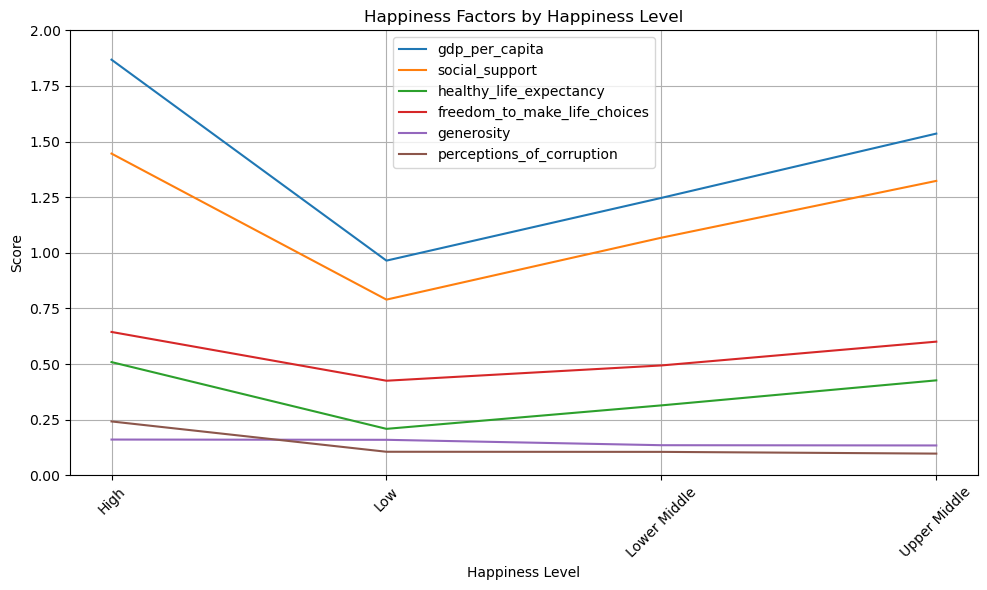

In [359]:


# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 각 칼럼을 선 그래프로 그리기
for col in hp_df.columns[1:]:
    plt.plot(hp_df['happy_level'], hp_df[col], label=col)

# 그래프 제목 및 레이블 설정
plt.title('Happiness Factors by Happiness Level')
plt.xlabel('Happiness Level')
plt.ylabel('Score')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.legend()  # 범례 표시


# y축 간격 설정
plt.yticks(np.arange(0, hp_df.iloc[:, 1:].max().max() + 0.25, 0.25))


# 그래프 출력
plt.tight_layout()
plt.show()

In [360]:
happiness_df = happiness_df.sort_values(by='region')


mean_values = happiness_df.groupby('region').mean('happiness_score').reset_index()

# 평균 값으로 DataFrame을 생성
happiness_mean_df = pd.DataFrame(mean_values)
display(happiness_mean_df)

region  happiness_score  gdp_per_capita  \
0          Central and Eastern Europe         5.967091        1.618364   
1  Commonwealth of Independent States         5.828250        1.231000   
2                           East Asia         5.930167        1.734667   
3         Latin America and Caribbean         5.966053        1.352289   
4        Middle East and North Africa         5.102143        1.514571   
5               North America and ANZ         7.018250        1.900500   
6                          South Asia         4.164000        1.069833   
7                      Southeast Asia         5.431222        1.400889   
8                  Sub-Saharan Africa         4.382485        0.912848   
9                      Western Europe         6.894350        1.911050   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0        1.361545                 0.430545                      0.566227   
1        1.381250                 0.368000                      0.675500   
2        1.316667                 0.521833                      0.510333   
3        1.260000                 0.412158                      0.605895   
4        1.081214                 0.403846                      0.438143   
5        1.496250                 0.494000                      0.640500   
6        0.733083                 0.259833                      0.512083   
7        1.149333                 0.360333                      0.667111   
8        0.814652                 0.148788                      0.429500   
9        1.434950                 0.547800                      0.627500   

   generosity  perceptions_of_corruption  
0    0.137273                   0.076227  
1    0.183500                   0.166750  
2    0.110833                   0.188083  
3    0.109158                   0.104632  
4    0.099286                   0.124786  
5    0.225000                   0.305875  
6    0.147167                   0.104500  
7    0.220667                   0.135611  
8    0.164727                   0.102697  
9    0.156750                   0.265600

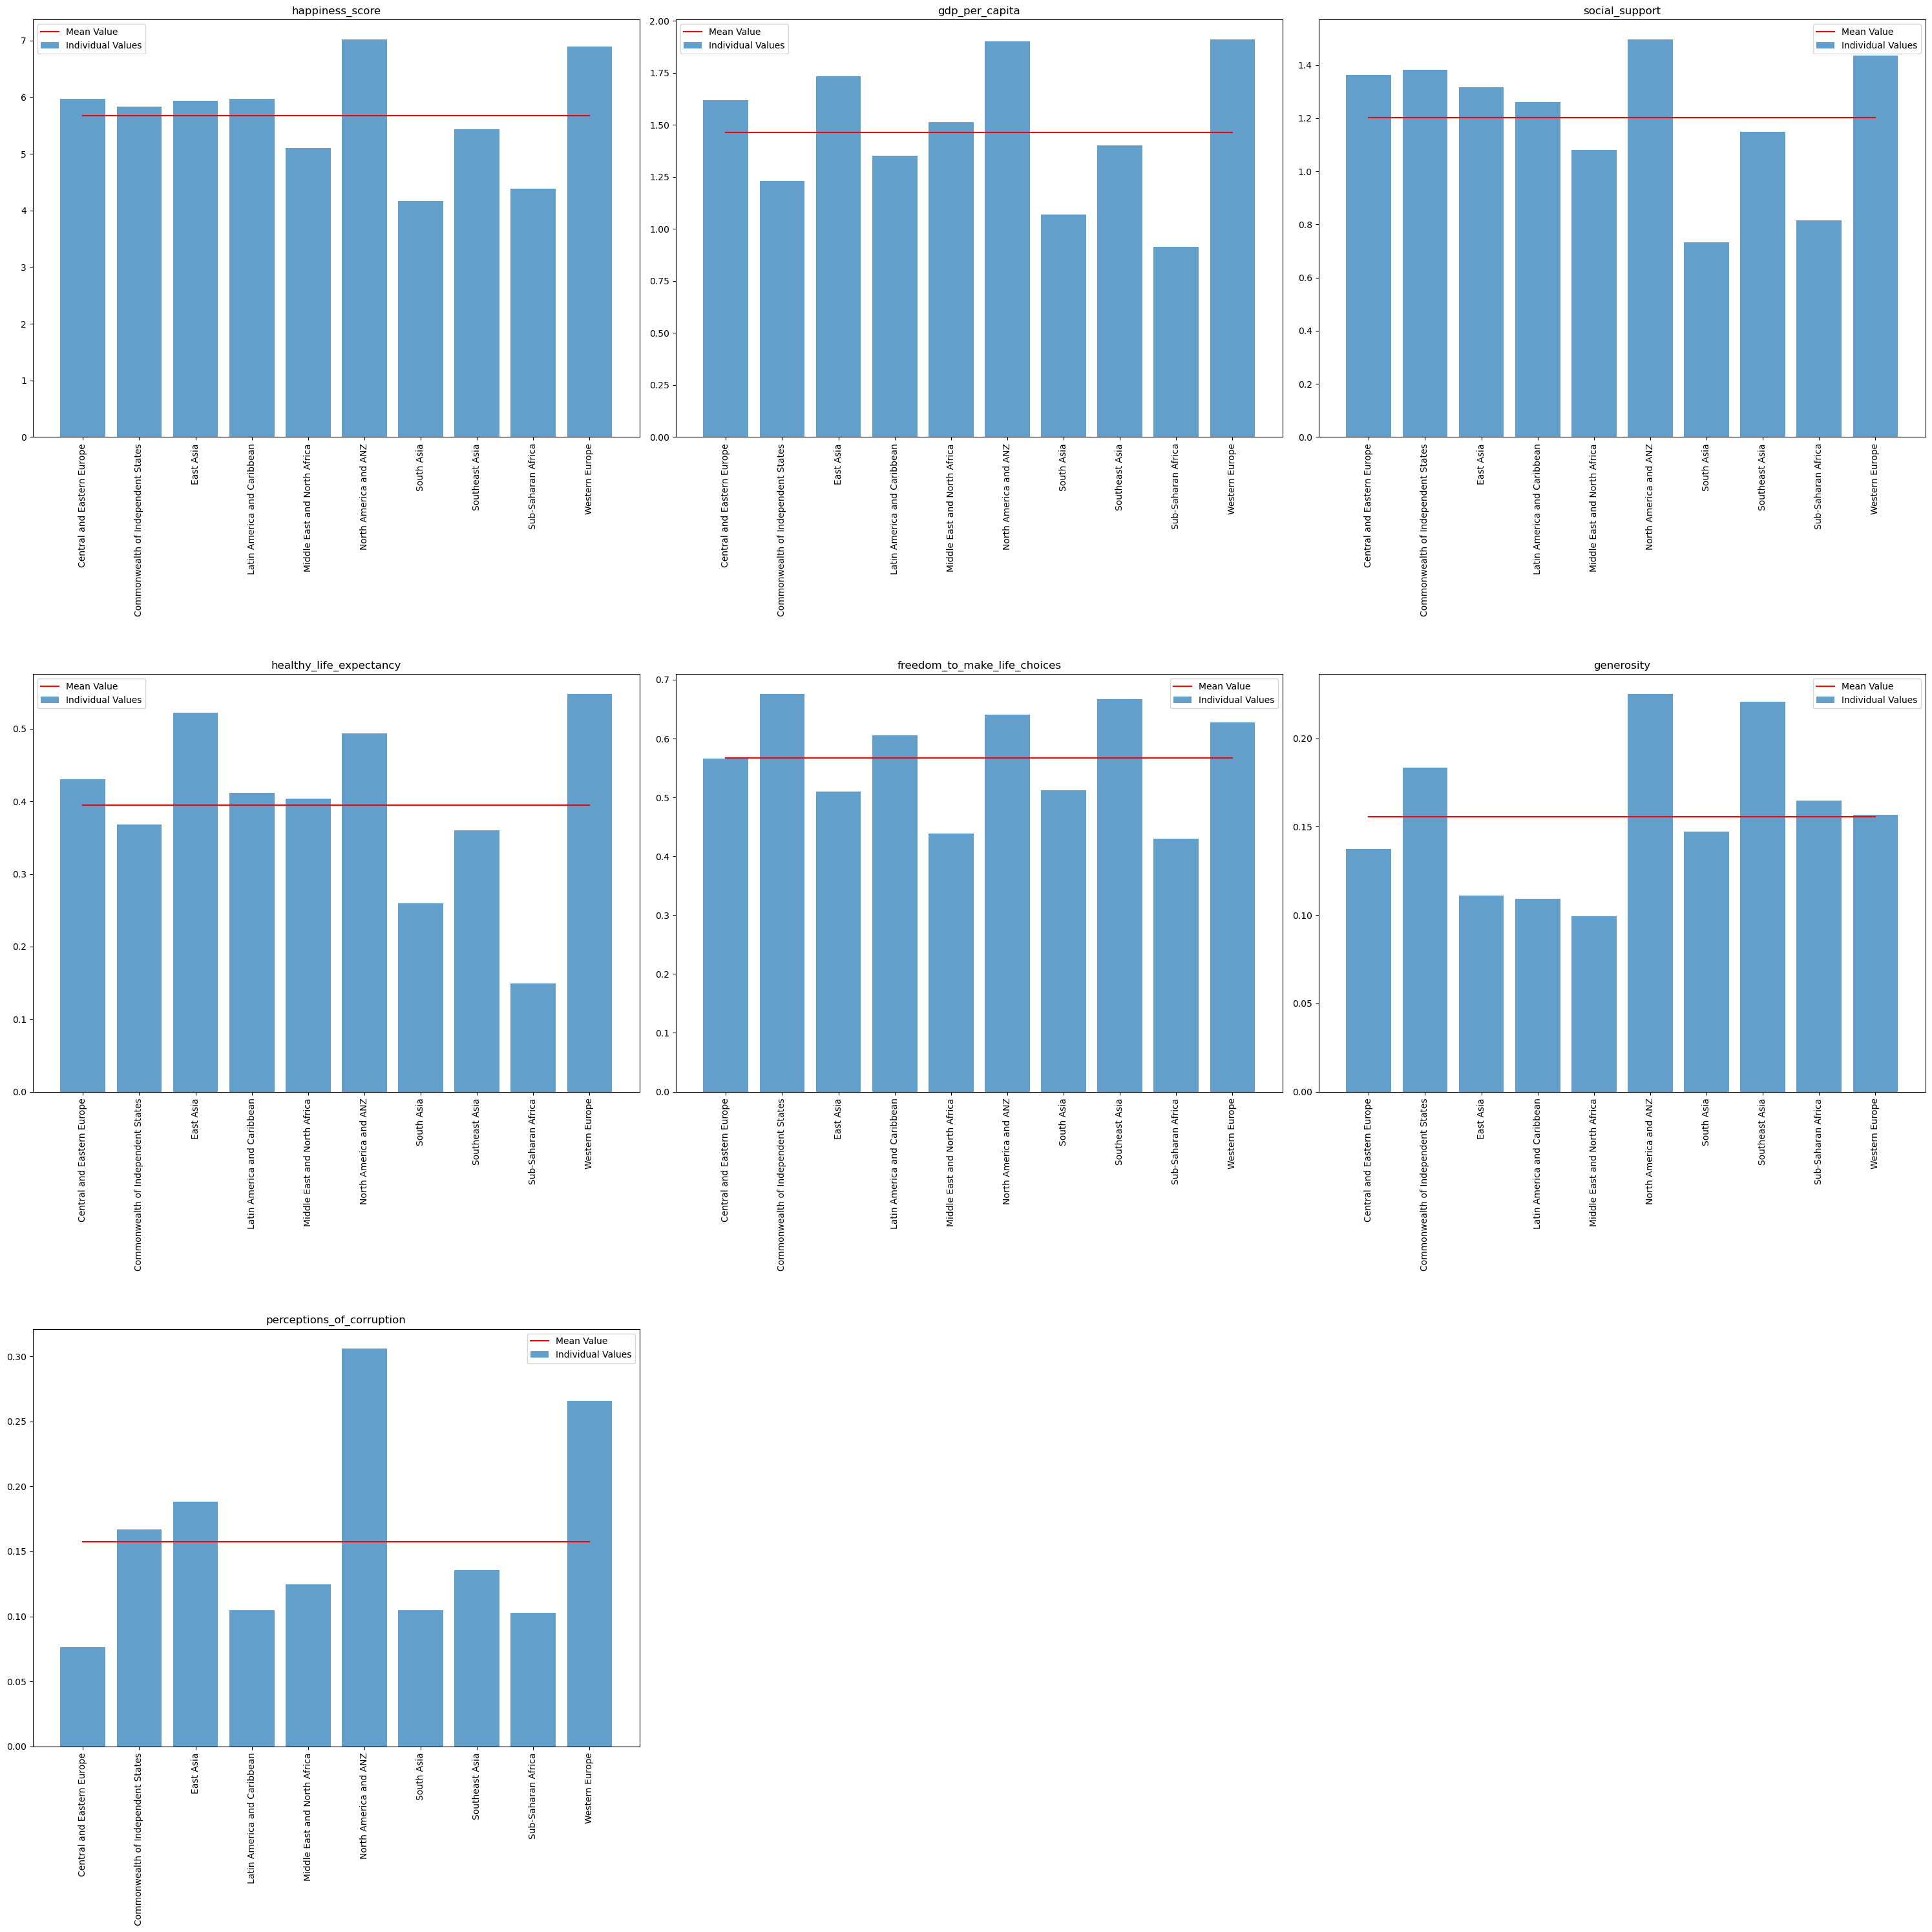

In [361]:
plt.figure(figsize=(30, 30))  # 적절한 크기로 조정

# 각 칼럼에 대한 막대 그래프 표시
for i, column in enumerate(happiness_mean_df.columns[1:]):
    plt.subplot(3, 3, i + 1)  # 3x3 그리드로 조정
    plt.bar(happiness_mean_df['region'], happiness_mean_df[column], alpha=0.7, label='Individual Values')
    plt.plot(happiness_mean_df['region'], happiness_mean_df[column].mean() * np.ones(len(happiness_mean_df)), color='red', label='Mean Value')  # 평균값 선 그래프 추가
    plt.title(column)
    plt.legend()  # 범례 표시

    # x축 라벨 90도 회전
    plt.xticks(rotation=90)

plt.tight_layout(h_pad=5)  # 수직 간격 설정
plt.show()


In [362]:
happiness_no_country = happiness_org_df.drop(columns=['country'])
std_by_region = happiness_no_country.groupby('region').std().reset_index()
std_by_region

region  happiness_score  gdp_per_capita  \
0          Central and Eastern Europe         0.559300        0.158668   
1  Commonwealth of Independent States         0.357055        0.307401   
2                           East Asia         0.403384        0.232407   
3         Latin America and Caribbean         0.381950        0.360087   
4        Middle East and North Africa         1.263875        0.285057   
5               North America and ANZ         0.108902        0.058095   
6                          South Asia         1.013106        0.254881   
7                      Southeast Asia         0.732066        0.354725   
8                  Sub-Saharan Africa         0.675345        0.279963   
9                      Western Europe         0.557576        0.118421   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0        0.178881                 0.047469                      0.076836   
1        0.106940                 0.054222                      0.072592   
2        0.122732                 0.161283                      0.101080   
3        0.117720                 0.064190                      0.076551   
4        0.297326                 0.066113                      0.204892   
5        0.035331                 0.070309                      0.056383   
6        0.337533                 0.124434                      0.186135   
7        0.154091                 0.114393                      0.090150   
8        0.257072                 0.067960                      0.103993   
9        0.101683                 0.017784                      0.129057   

   generosity  perceptions_of_corruption  
0    0.073904                   0.085096  
1    0.075231                   0.115226  
2    0.076006                   0.105589  
3    0.039608                   0.068687  
4    0.067307                   0.074270  
5    0.014000                   0.093894  
6    0.042785                   0.034990  
7    0.091106                   0.108821  
8    0.068088                   0.060644  
9    0.072322                   0.129544

In [374]:
# 'region'이 'Europe'에 해당하는 행만 추출
europe_df = happiness_org_df[(happiness_org_df['region'] == 'Western Europe') | (happiness_org_df['region'] == 'Central and Eastern Europe')]
display(europe_df)

# 'region'이 'Africa'에 해당하는 행만 추출
africa_df = happiness_org_df[(happiness_org_df['region'] == 'Sub-Saharan Africa') | (happiness_org_df['region'] == 'Middle East and North Africa')]

# 데이터프레임 형태로 변환
europe_df = pd.DataFrame(europe_df)
africa_df = pd.DataFrame(africa_df)

# 결과 확인
display(europe_df)
display(africa_df)

country                      region  happiness_score  \
0                  Finland              Western Europe            7.804   
1                  Denmark              Western Europe            7.586   
2                  Iceland              Western Europe            7.530   
4              Netherlands              Western Europe            7.403   
5                   Sweden              Western Europe            7.395   
6                   Norway              Western Europe            7.315   
7              Switzerland              Western Europe            7.240   
8               Luxembourg              Western Europe            7.228   
10                 Austria              Western Europe            7.097   
13                 Ireland              Western Europe            6.911   
15                 Germany              Western Europe            6.892   
16                 Belgium              Western Europe            6.859   
17                 Czechia  Central and Eastern Europe            6.845   
18          United Kingdom              Western Europe            6.796   
19               Lithuania  Central and Eastern Europe            6.763   
20                  France              Western Europe            6.661   
21                Slovenia  Central and Eastern Europe            6.650   
23                 Romania  Central and Eastern Europe            6.589   
28                Slovakia  Central and Eastern Europe            6.469   
30                 Estonia  Central and Eastern Europe            6.455   
31                   Spain              Western Europe            6.436   
32                   Italy              Western Europe            6.405   
33                  Kosovo  Central and Eastern Europe            6.368   
36                   Malta              Western Europe            6.300   
38                  Poland  Central and Eastern Europe            6.260   
40                  Latvia  Central and Eastern Europe            6.213   
44                  Serbia  Central and Eastern Europe            6.144   
45                  Cyprus              Western Europe            6.130   
47                 Croatia  Central and Eastern Europe            6.125   
50                 Hungary  Central and Eastern Europe            6.041   
55                Portugal              Western Europe            5.968   
57                  Greece              Western Europe            5.931   
62                 Moldova  Central and Eastern Europe            5.819   
66              Montenegro  Central and Eastern Europe            5.722   
69                  Russia  Central and Eastern Europe            5.661   
70  Bosnia and Herzegovina  Central and Eastern Europe            5.633   
76                Bulgaria  Central and Eastern Europe            5.466   
78                 Armenia  Central and Eastern Europe            5.342   
82                 Albania  Central and Eastern Europe            5.277   
86         North Macedonia  Central and Eastern Europe            5.254   
89                 Georgia  Central and Eastern Europe            5.109   
91                 Ukraine  Central and Eastern Europe            5.071   

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            1.888           1.585                    0.535   
1            1.949           1.548                    0.537   
2            1.926           1.620                    0.559   
4            1.942           1.488                    0.545   
5            1.921           1.510                    0.562   
6            1.994           1.521                    0.544   
7            2.022           1.463                    0.582   
8            2.200           1.357                    0.549   
10           1.927           1.382                    0.535   
13           2.152           1.425                    0.539   
15           1.919           1.401                    0.539   
16           1.907           1.449   

country                      region  happiness_score  \
0                  Finland              Western Europe            7.804   
1                  Denmark              Western Europe            7.586   
2                  Iceland              Western Europe            7.530   
4              Netherlands              Western Europe            7.403   
5                   Sweden              Western Europe            7.395   
6                   Norway              Western Europe            7.315   
7              Switzerland              Western Europe            7.240   
8               Luxembourg              Western Europe            7.228   
10                 Austria              Western Europe            7.097   
13                 Ireland              Western Europe            6.911   
15                 Germany              Western Europe            6.892   
16                 Belgium              Western Europe            6.859   
17                 Czechia  Central and Eastern Europe            6.845   
18          United Kingdom              Western Europe            6.796   
19               Lithuania  Central and Eastern Europe            6.763   
20                  France              Western Europe            6.661   
21                Slovenia  Central and Eastern Europe            6.650   
23                 Romania  Central and Eastern Europe            6.589   
28                Slovakia  Central and Eastern Europe            6.469   
30                 Estonia  Central and Eastern Europe            6.455   
31                   Spain              Western Europe            6.436   
32                   Italy              Western Europe            6.405   
33                  Kosovo  Central and Eastern Europe            6.368   
36                   Malta              Western Europe            6.300   
38                  Poland  Central and Eastern Europe            6.260   
40                  Latvia  Central and Eastern Europe            6.213   
44                  Serbia  Central and Eastern Europe            6.144   
45                  Cyprus              Western Europe            6.130   
47                 Croatia  Central and Eastern Europe            6.125   
50                 Hungary  Central and Eastern Europe            6.041   
55                Portugal              Western Europe            5.968   
57                  Greece              Western Europe            5.931   
62                 Moldova  Central and Eastern Europe            5.819   
66              Montenegro  Central and Eastern Europe            5.722   
69                  Russia  Central and Eastern Europe            5.661   
70  Bosnia and Herzegovina  Central and Eastern Europe            5.633   
76                Bulgaria  Central and Eastern Europe            5.466   
78                 Armenia  Central and Eastern Europe            5.342   
82                 Albania  Central and Eastern Europe            5.277   
86         North Macedonia  Central and Eastern Europe            5.254   
89                 Georgia  Central and Eastern Europe            5.109   
91                 Ukraine  Central and Eastern Europe            5.071   

    gdp_per_capita  social_support  healthy_life_expectancy  \
0            1.888           1.585                    0.535   
1            1.949           1.548                    0.537   
2            1.926           1.620                    0.559   
4            1.942           1.488                    0.545   
5            1.921           1.510                    0.562   
6            1.994           1.521                    0.544   
7            2.022           1.463                    0.582   
8            2.200           1.357                    0.549   
10           1.927           1.382                    0.535   
13           2.152           1.425                    0.539   
15           1.919           1.401                    0.539   
16           1.907           1.449   

country                        region  happiness_score  \
3                  Israel  Middle East and North Africa            7.473   
25   United Arab Emirates  Middle East and North Africa            6.571   
29           Saudi Arabia  Middle East and North Africa            6.463   
41                Bahrain  Middle East and North Africa            6.173   
58              Mauritius            Sub-Saharan Africa            5.902   
80                Algeria  Middle East and North Africa            5.329   
84           South Africa            Sub-Saharan Africa            5.275   
85    Congo (Brazzaville)            Sub-Saharan Africa            5.267   
90                 Guinea            Sub-Saharan Africa            5.072   
92            Ivory Coast            Sub-Saharan Africa            5.053   
93                  Gabon            Sub-Saharan Africa            5.035   
94                Nigeria            Sub-Saharan Africa            4.981   
95               Cameroon            Sub-Saharan Africa            4.973   
96             Mozambique            Sub-Saharan Africa            4.954   
97                   Iraq  Middle East and North Africa            4.941   
98     State of Palestine  Middle East and North Africa            4.908   
99                Morocco  Middle East and North Africa            4.903   
100                  Iran  Middle East and North Africa            4.876   
101               Senegal            Sub-Saharan Africa            4.855   
102            Mauritania            Sub-Saharan Africa            4.724   
103          Burkina Faso            Sub-Saharan Africa            4.638   
104               Namibia            Sub-Saharan Africa            4.631   
105               Turkiye  Middle East and North Africa            4.614   
106                 Ghana            Sub-Saharan Africa            4.605   
108                 Niger            Sub-Saharan Africa            4.501   
109               Tunisia  Middle East and North Africa            4.497   
110                 Kenya            Sub-Saharan Africa            4.487   
112                Uganda            Sub-Saharan Africa            4.432   
113                  Chad            Sub-Saharan Africa            4.397   
115                 Benin            Sub-Saharan Africa            4.374   
118                Gambia            Sub-Saharan Africa            4.279   
119                  Mali            Sub-Saharan Africa            4.198   
120                 Egypt  Middle East and North Africa            4.170   
121                  Togo            Sub-Saharan Africa            4.137   
122                Jordan  Middle East and North Africa            4.120   
123              Ethiopia            Sub-Saharan Africa            4.091   
124               Liberia            Sub-Saharan Africa            4.042   
126            Madagascar            Sub-Saharan Africa            4.019   
127                Zambia            Sub-Saharan Africa            3.982   
128              Tanzania            Sub-Saharan Africa            3.694   
129               Comoros            Sub-Saharan Africa            3.545   
130                Malawi            Sub-Saharan Africa            3.495   
131              Botswana            Sub-Saharan Africa            3.435   
132      Congo (Kinshasa)            Sub-Saharan Africa            3.207   
133              Zimbabwe            Sub-Saharan Africa            3.204   
134          Sierra Leone            Sub-Saharan Africa            3.138   
135               Lebanon  Middle East and North Africa            2.392   

     gdp_per_capita  social_support  healthy_life_expectancy  \
3             1.833          1.5210                 0.577000   
25            2.015          1.2230                 0.401000   
29            1.861          1.3700                 0.351000   
41            1.883          1.2690                 0.389000   
58            1.589          1.3820              

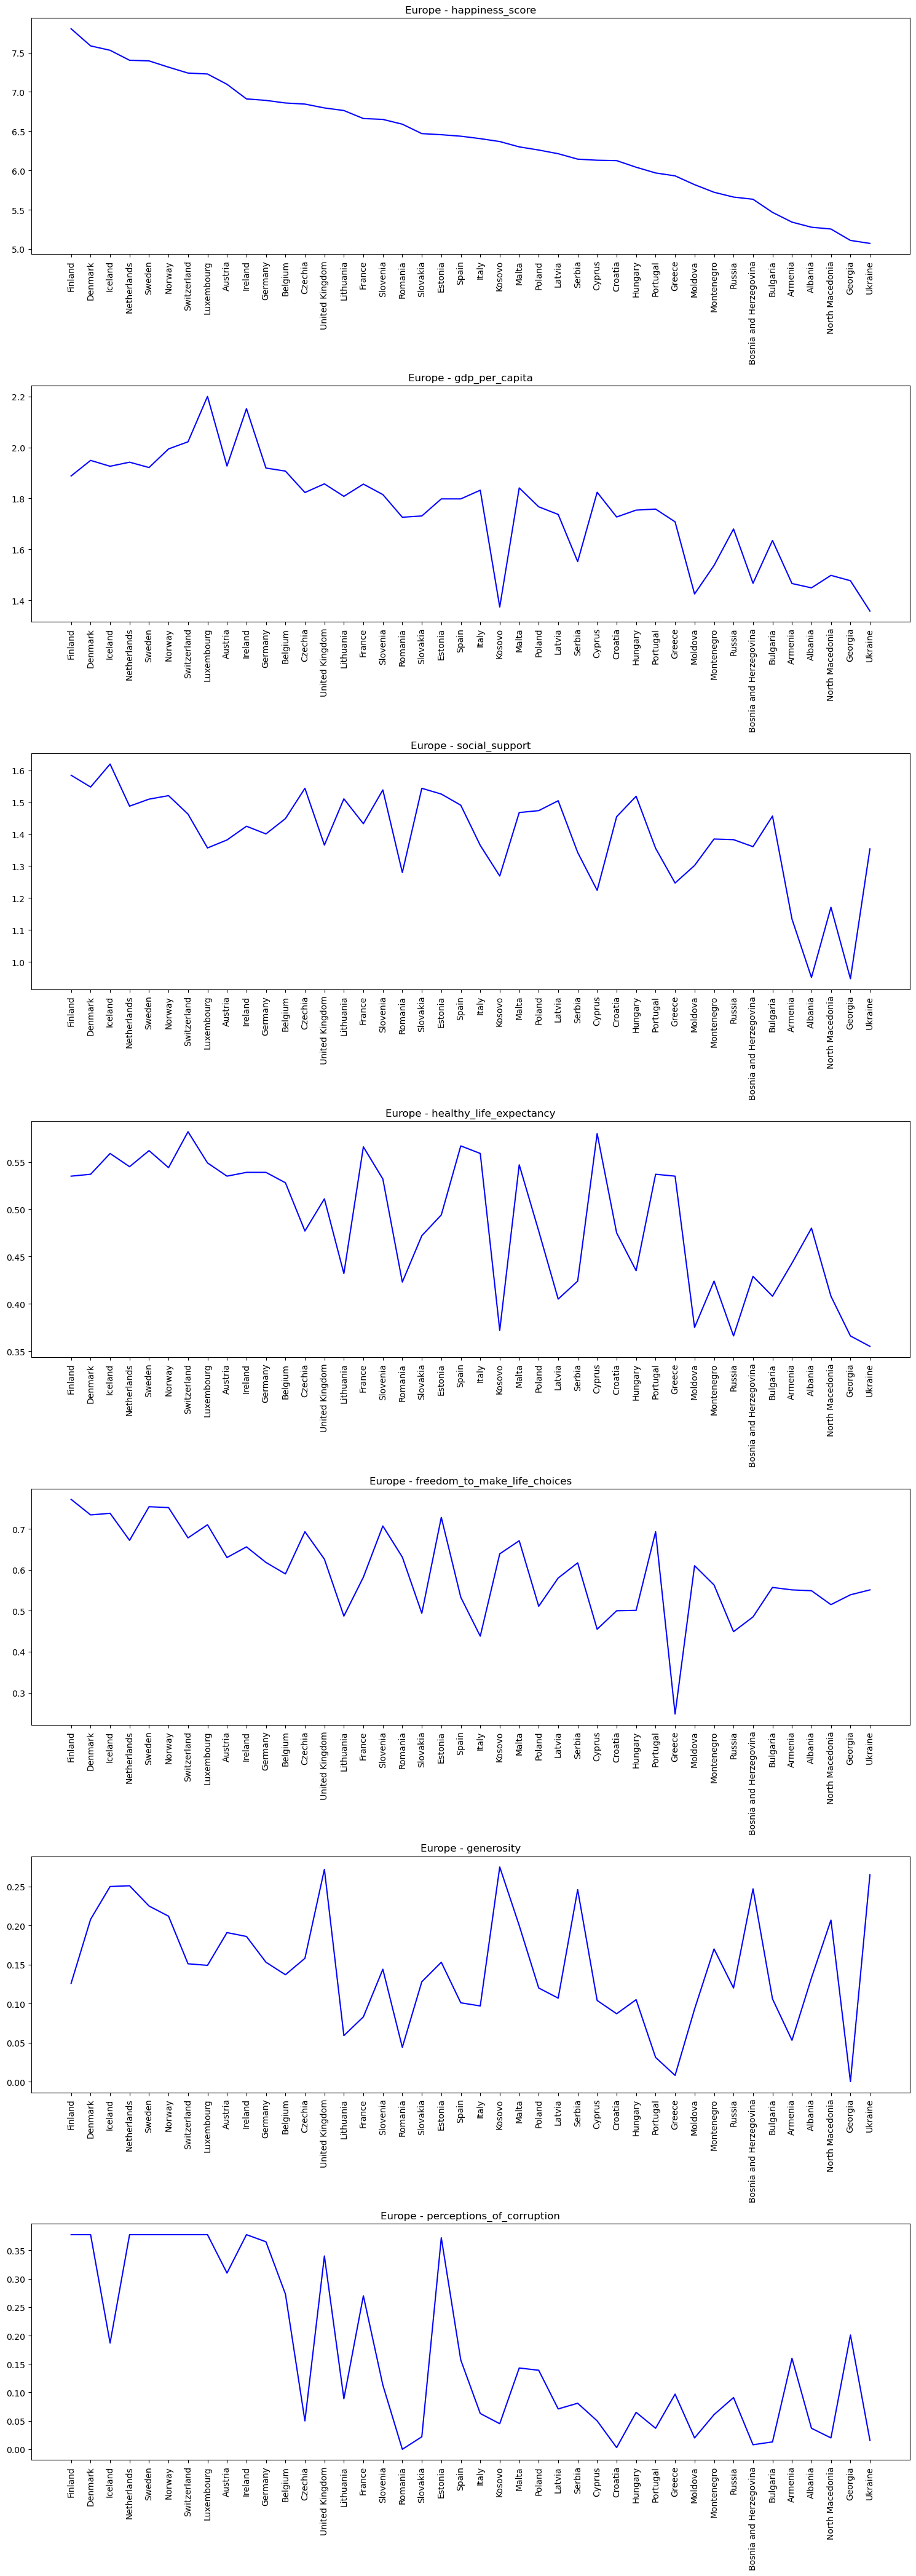

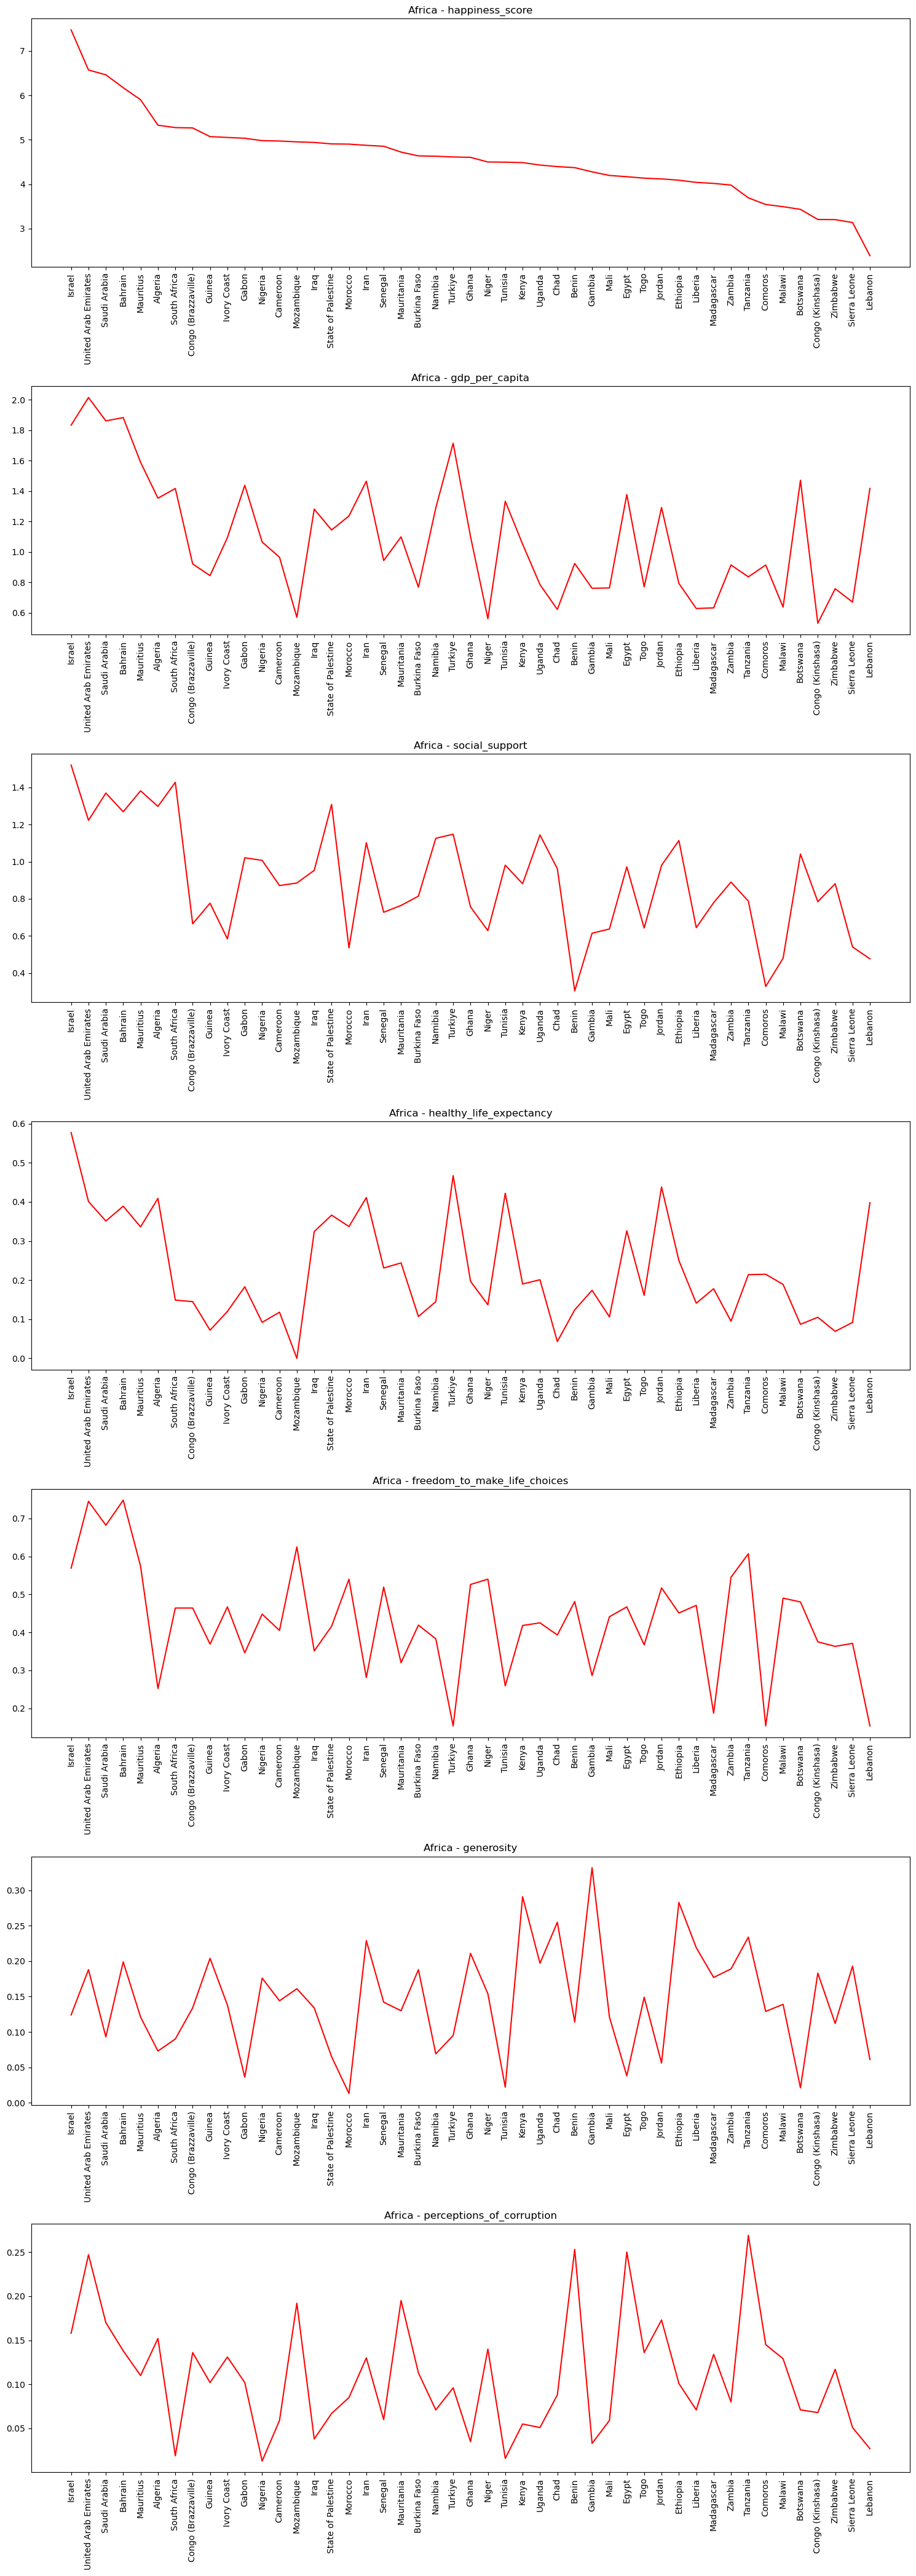

In [407]:
# europe_df= europe_df.drop(columns=['region'])
# africa_df= africa_df.drop(columns=['region'])

import matplotlib.pyplot as plt

# 적절한 크기로 조정
plt.figure(figsize=(15, 6 * len(europe_df.columns[1:])))

# Europe 데이터프레임의 각 칼럼에 대해 그래프 그리기
for i, column in enumerate(europe_df.columns[1:]):
    plt.subplot(len(europe_df.columns[1:]), 1, i+1)
    plt.plot(europe_df['country'], europe_df[column], linestyle='-', color='blue')
    plt.title('Europe - ' + column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 아프리카 데이터프레임의 각 칼럼에 대해 그래프 그리기
plt.figure(figsize=(15, 6 * len(africa_df.columns[1:])))
for i, column in enumerate(africa_df.columns[1:]):
    plt.subplot(len(africa_df.columns[1:]), 1, i+1)
    plt.plot(africa_df['country'], africa_df[column], linestyle='-', color='red')
    plt.title('Africa - ' + column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


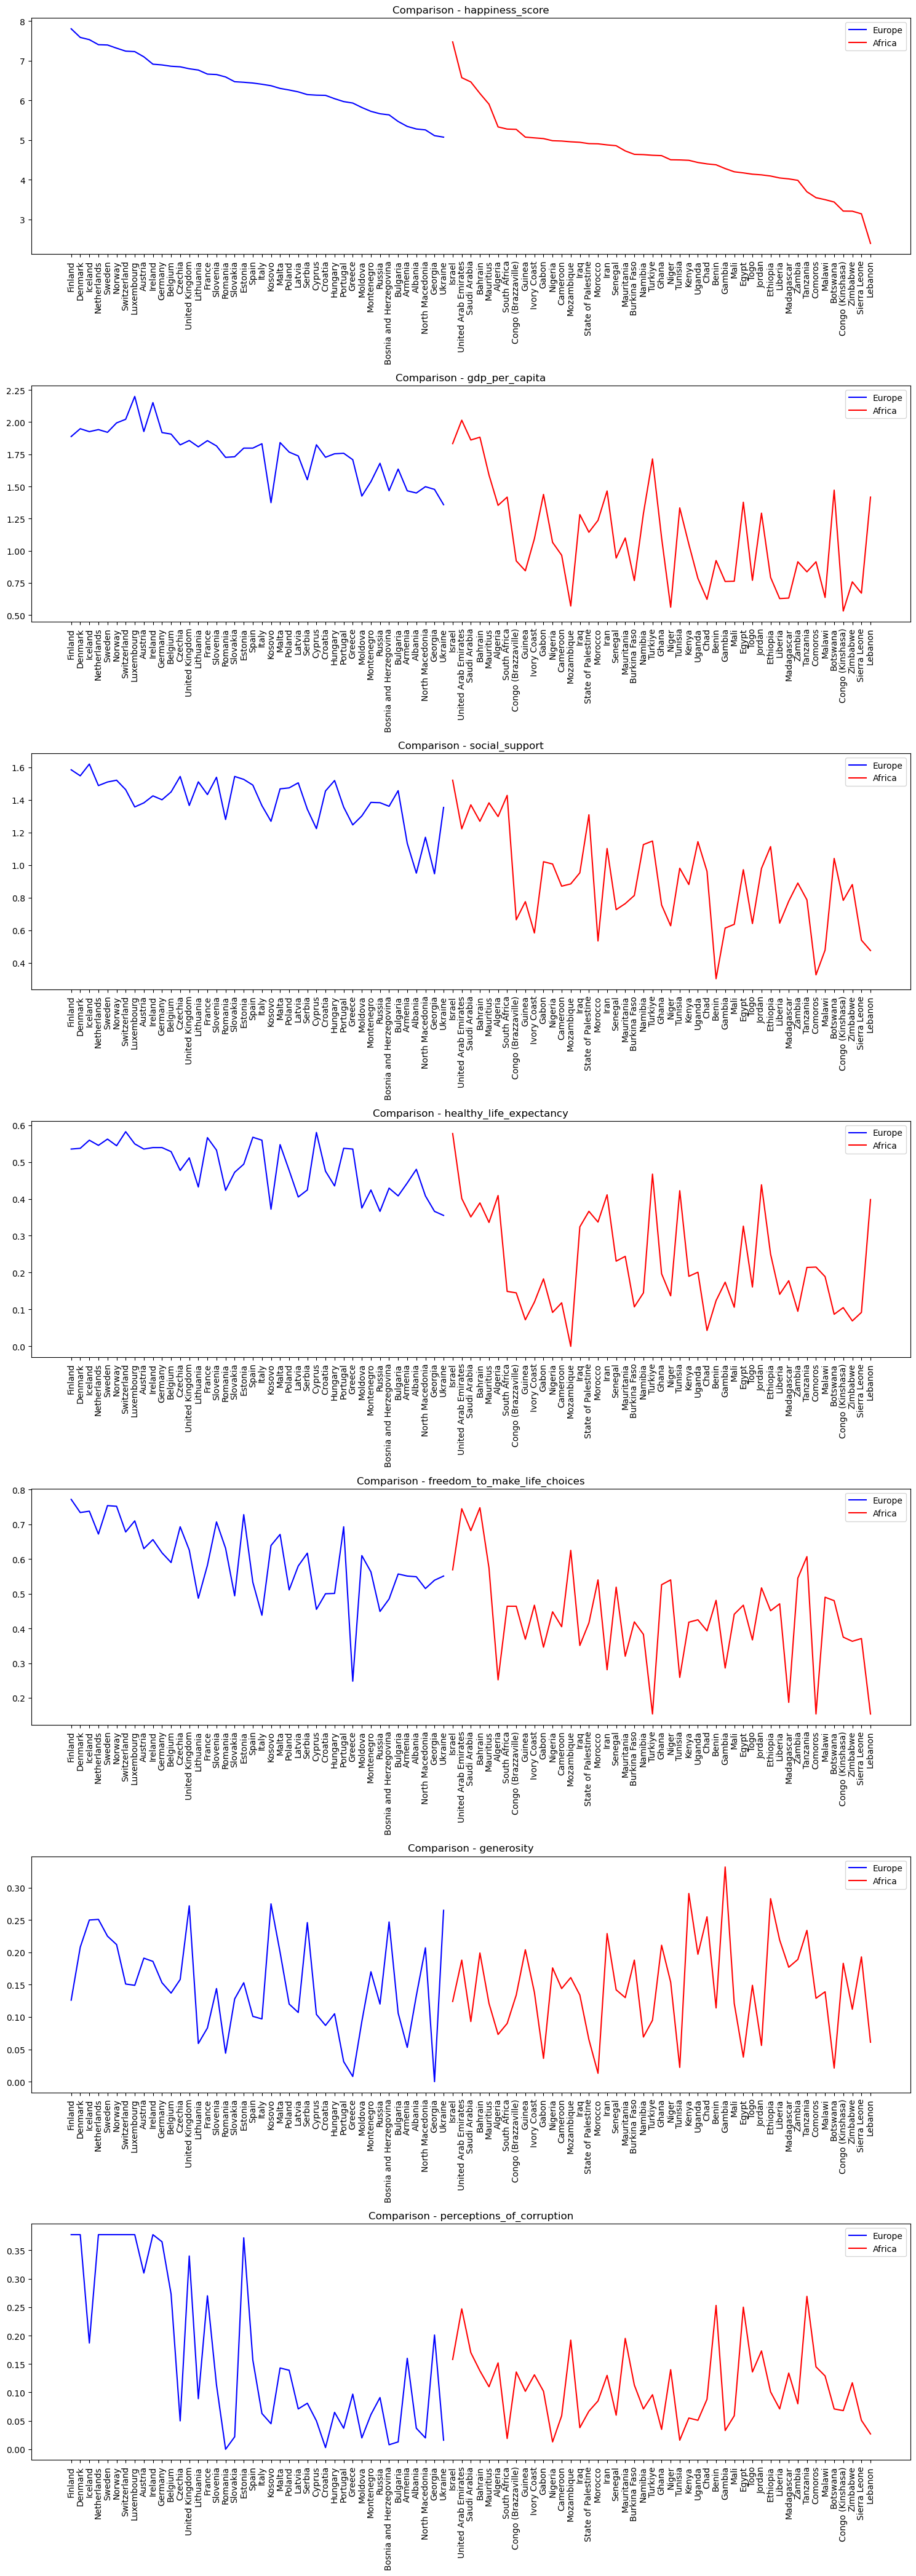

In [408]:
# 적절한 크기로 조정
plt.figure(figsize=(15, 6 * len(europe_df.columns[1:])))

# Europe 데이터프레임의 각 칼럼에 대해 그래프 그리기
for i, column in enumerate(europe_df.columns[1:]):
    plt.subplot(len(europe_df.columns[1:]), 1, i+1)
    plt.plot(europe_df['country'], europe_df[column], linestyle='-', color='blue', label='Europe')
    plt.plot(africa_df['country'], africa_df[column], linestyle='-', color='red', label='Africa')
    plt.title('Comparison - ' + column)
    plt.xticks(rotation=90)
    plt.legend()

plt.tight_layout()
plt.show()

#### 유럽:
- 행복지수가 평균 이상이며, GDP, 사회적 지지, 건강 기대수명이 높은 편이다. 
- 자유로운 의사결정권과 관대함 지표는 높은 수준에 이다.
- 부패 인식 수준이 낮은 편이다.
- 전체적인 요소가 아프리카에 비하여 큰 차이의 폭 없이 분포하고 있다.
- 아프리카에 비해 평균적으로 전체적인 요소가 높은 양상을 보인다.


#### 아프리카:
- 평균 행복지수가 낮은 편이며, 중동과 북아프리카는 GDP가 평균 이상이지만 사하라 아프리카는 GDP가 매우 낮다. 타 요소들 또한 중동과 북아프리카는 평균수준인 반면, 사하라 아프리카는 평균보다 낮은 수치를 보인다.
- 행복 지수와 요소들 간의 상관관계도 나타나지만, 강한 상관 관계를 보이는 요소는 없다.

In [396]:
# 'happy_level' 칼럼 제외
numeric_df = happiness_org_df.drop(columns=['country','region'])

# 상관 관계 계산
correlation_matrix = numeric_df.corr()
target = correlation_matrix[['happiness_score']]
# 결과 출력
display(target)

happiness_score
happiness_score                      1.000000
gdp_per_capita                       0.788094
social_support                       0.831581
healthy_life_expectancy              0.747267
freedom_to_make_life_choices         0.652118
generosity                           0.050133
perceptions_of_corruption            0.453733

### 전체국가
- 각 칼럼간의 상관관계 분석결과 전체 국가를 대상으로는 행복지수, 경제적안정성, 사회적 지지, 건강 기대수면은 0.7이상으로 강한 상관 관계를 보인다.
- 부패와 자유로운 의사결정권은 0.4~0.7 사이로 중간 상관 관계를 보인다.
- 관대함은 0.1 미만으로 아주 약한 상관 관계를 보인다.



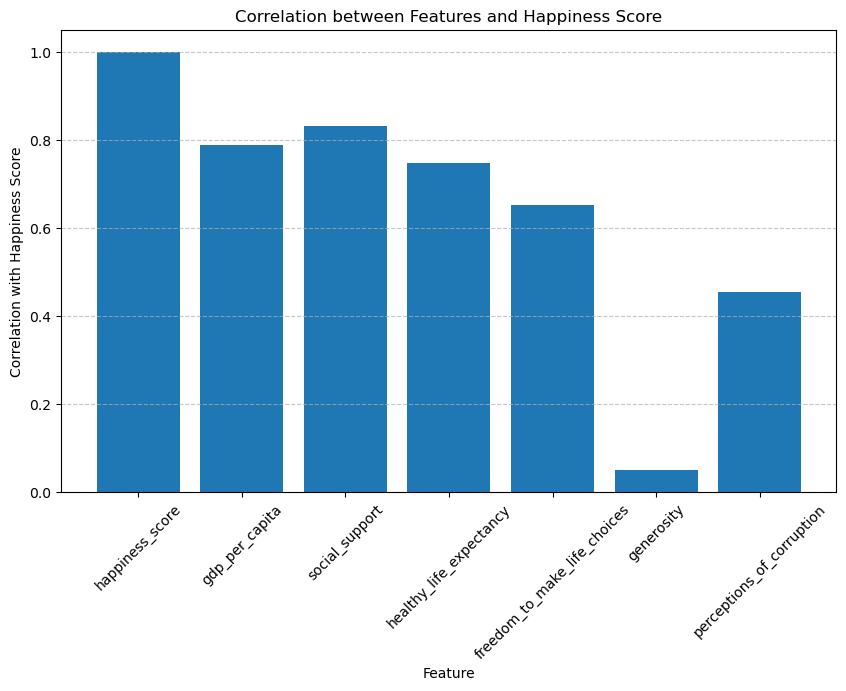

In [397]:
import matplotlib.pyplot as plt

# 바 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(target.index, target['happiness_score'])
plt.xlabel('Feature')
plt.ylabel('Correlation with Happiness Score')
plt.title('Correlation between Features and Happiness Score')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.show()

In [399]:
# 'happy_level' 칼럼 제외
# numeric_df2 = africa_df.drop(columns=['country','region'])

# 상관 관계 계산
correlation_matrix2 = numeric_df2.corr()
target = correlation_matrix2[['happiness_score']]
# 결과 출력
display(target)

happiness_score
happiness_score                      1.000000
gdp_per_capita                       0.609998
social_support                       0.633629
healthy_life_expectancy              0.419534
freedom_to_make_life_choices         0.500064
generosity                          -0.039065
perceptions_of_corruption            0.218410

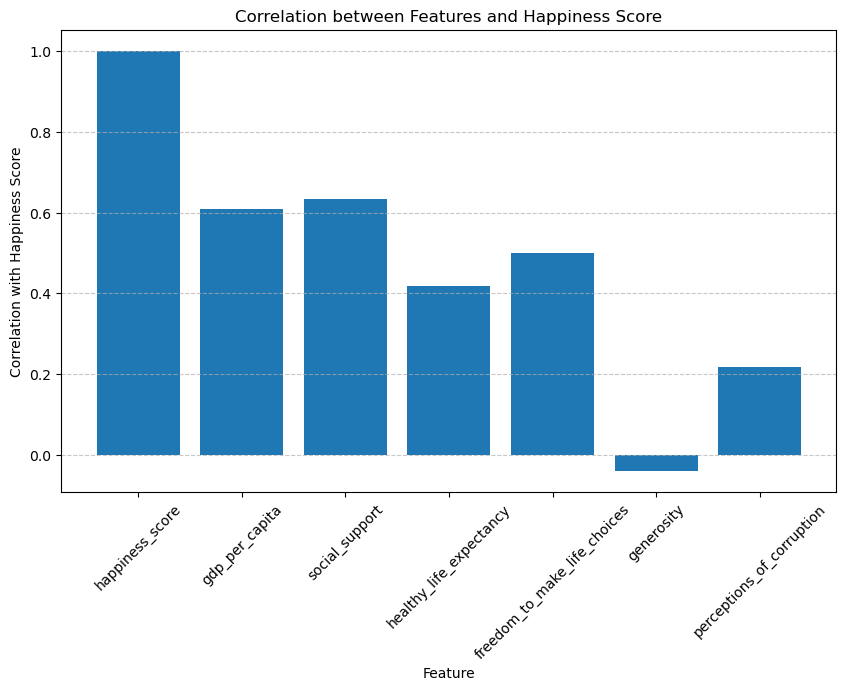

In [400]:
import matplotlib.pyplot as plt

# 바 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(target.index, target['happiness_score'])
plt.xlabel('Feature')
plt.ylabel('Correlation with Happiness Score')
plt.title('Correlation between Features and Happiness Score')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.show()

#### 아프리카:
- 행복 지수와 요소들 간의 상관관계도 나타나지만, 강한 상관 관계를 보이는 요소는 없다.
- 관대함과 부패정도를 제외한 나머지 요소들이 0.4 ~ 0.7 사이로 중간 상관 관계를 보인다.
- 아프리카 국가들은 유럽에 비해 상대적으로 부패 인식과의 상관 관계가 낮으며, 행복 지수와의 상관관계가 음의 상관관계를 보인다.


In [401]:
# 'happy_level' 칼럼 제외
# numeric_df3 = europe_df.drop(columns=['country','region'])

# 상관 관계 계산
correlation_matrix3 = numeric_df3.corr()
target = correlation_matrix3[['happiness_score']]
# 결과 출력
display(target)

happiness_score
happiness_score                      1.000000
gdp_per_capita                       0.829270
social_support                       0.668193
healthy_life_expectancy              0.685530
freedom_to_make_life_choices         0.625528
generosity                           0.299920
perceptions_of_corruption            0.718986

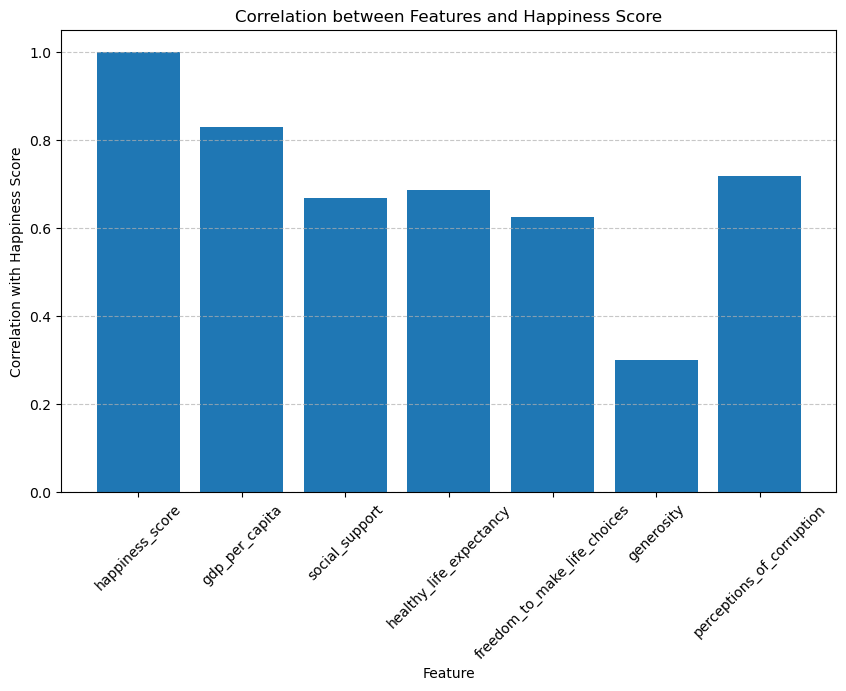

In [402]:
import matplotlib.pyplot as plt

# 바 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(target.index, target['happiness_score'])
plt.xlabel('Feature')
plt.ylabel('Correlation with Happiness Score')
plt.title('Correlation between Features and Happiness Score')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.show()

#### 유럽:
- 행복지수와 GDP가 0.7 이상으로 강한 상관관계를 보인다.
- 관대함을 제외한 요소들은 0.4 ~ 0.7 사이로 중간 상관 관계를 보인다.

## 결론


### 유럽과 아프리카국가 간의 비교

📌  두 지역의 표준 편차를 비교 하였을 때, 유럽지역은 행복지수와 관련된 요소들의 표준편차가 상대적으로 낮게 나타난다. 이는 유럽 지역이 경제적으로 안정되어 있고 사회적 지원 체계가 잘 구축되어 있어서 행복에 영향을 미치는 요소들의 변동성이 낮다는 것을 시사한다. 특히 GDP와 사회적 지지 등의 요소들의 변동성이 낮게 나타난다. 반면, 아프리카 지역은 행복지수와 관련된 요소들의 표준편차가 비교적 높게 나타났다. 이는 아프리카 지역의 다양한 문화적, 정치적, 경제적 상황 등으로 인해 행복에 영향을 미치는 요소들의 변동성이 크다는 것을 시사한다. 특히 건강 기대수명과 자유로운 의사결정권 등의 요소들의 변동성이 높게 나타난다.


📌 아프리카는 지역 간에도 사회적 편차를 보이는데, 이는 사하라 아프리카와 북 아프리카 간의 경제적, 사회적 차이로 인한 것으로 보인다. 위의 결과 분석을 통해 유럽과 아프리카 국가 간의 행복지수 및 관련 요소들의 차이를 파악하였다. 유럽이 전반적인 수치가 아프리카에 대비하여 높다. 이는 행복지수는 단순히 한 요소로만 결정되는 것이 아니라 타 사회적, 경제적 요소가 복합적으로 얽혀있음을 시사한다.